# F1 All Time Races Analysis

In [2]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import re
import datetime
import matplotlib.pyplot as plt


#### Importing all the csv files

In [3]:
df = pd.read_csv('../csv_files/races_info.csv', index_col = [0])
df_drivers = pd.read_csv('../csv_files/drivers_info.csv', index_col = [0])
df_circuits = pd.read_csv('../csv_files/circuits_info.csv', index_col = [0])
df_constructors = pd.read_csv('../csv_files/constructors_info.csv', index_col = [0])

In [4]:
df_constructors = df_constructors.transpose()
df_drivers = df_drivers.transpose()
df_circuits = df_circuits.transpose()

In [5]:
df_constructors = df_constructors[['constructorId', 'name', 'nationality']]
df_drivers = df_drivers[['driverId','givenName','familyName','dateOfBirth', 'nationality']]
df_circuits = df_circuits[['circuitId','circuitName']]

In [6]:
merge_constructors = df.merge( df_constructors, left_on = 'constructor', right_on = 'constructorId')

In [7]:
merge_drivers = merge_constructors.merge( df_drivers, left_on = 'driver', right_on = 'driverId')

In [8]:
merge_circuits = merge_drivers.merge( df_circuits, left_on = 'circuit', right_on = 'circuitId')
clean_df = merge_circuits

In [9]:
clean_df['driver_name'] = clean_df['givenName'] + " " + clean_df['familyName']
clean_df = clean_df.drop(['driver','driverId', 'givenName', 'familyName','constructorId', 'circuitId', 'circuit','constructor'], axis = 1)

In [10]:
clean_df = clean_df.rename(columns = {'circuitName':'circuit_name','name':'constructor','nationality_x':'constructor_nationality','nationality_y':'drivers_nationality', 'dateOfBirth':'birth'})
clean_df


,year,round,status,position,points,laps,race_time,fastest_lap_time,lap,fastest_lap_rank,average_speed,constructor,constructor_nationality,birth,drivers_nationality,circuit_name,driver_name
0,1950,3,+15 Laps,22,0.0,123,NaN,NaN,NaN,NaN,NaN,Rae,American,1913-12-15,American,Indianapolis Motor Speedway,Walt Ader
1,1950,3,Oil leak,28,0.0,64,NaN,NaN,NaN,NaN,NaN,Kurtis Kraft,American,1913-08-21,American,Indianapolis Motor Speedway,Fred Agabashian
2,1951,2,Clutch,17,0.0,109,NaN,NaN,NaN,NaN,NaN,Kurtis Kraft,American,1913-08-21,American,Indianapolis Motor Speedway,Fred Agabashian
3,1952,2,Turbo,27,0.0,71,NaN,NaN,NaN,NaN,NaN,Kurtis Kraft,American,1913-08-21,American,Indianapolis Motor Speedway,Fred Agabashian
4,1953,2,Finished,4,1.5,200,+4:39.24,NaN,NaN,NaN,NaN,Kurtis Kraft,American,1913-08-21,American,Indianapolis Motor Speedway,Fred Agabashian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24524,2018,4,Finished,12,0.0,51,+24.720,1:48.035,38.0,15.0,200.035,Toro Rosso,Italian,1996-02-07,French,Baku City Circuit,Pierre Gasly
24525,2018,4,Finished,10,1.0,51,+18.030,1:48.288,51.0,17.0,199.567,Toro Rosso,Italian,1989-11-10,New Zealander,Baku City Circuit,Brendon Hartley
24526,2017,8,Finished,6,8.0,51,+30.298,1:45.634,39.0,9.0,204.581,Force India,Indian,1996-09-17,French,Baku City Circuit,Esteban Ocon
24527,2018,4,Collision,19,0.0,0,NaN,NaN,NaN,NaN,NaN,Force India,Indian,1996-09-17,French,Baku City Circuit,Esteban Ocon


In [11]:
df = clean_df[['year','driver_name','constructor', 'circuit_name', 'round','status', 'position', 'points', 'laps', 'race_time', 'fastest_lap_time','lap','fastest_lap_rank','average_speed', 'drivers_nationality','birth', 'constructor_nationality']]
df

,year,driver_name,constructor,circuit_name,round,status,position,points,laps,race_time,fastest_lap_time,lap,fastest_lap_rank,average_speed,drivers_nationality,birth,constructor_nationality
0,1950,Walt Ader,Rae,Indianapolis Motor Speedway,3,+15 Laps,22,0.0,123,NaN,NaN,NaN,NaN,NaN,American,1913-12-15,American
1,1950,Fred Agabashian,Kurtis Kraft,Indianapolis Motor Speedway,3,Oil leak,28,0.0,64,NaN,NaN,NaN,NaN,NaN,American,1913-08-21,American
2,1951,Fred Agabashian,Kurtis Kraft,Indianapolis Motor Speedway,2,Clutch,17,0.0,109,NaN,NaN,NaN,NaN,NaN,American,1913-08-21,American
3,1952,Fred Agabashian,Kurtis Kraft,Indianapolis Motor Speedway,2,Turbo,27,0.0,71,NaN,NaN,NaN,NaN,NaN,American,1913-08-21,American
4,1953,Fred Agabashian,Kurtis Kraft,Indianapolis Motor Speedway,2,Finished,4,1.5,200,+4:39.24,NaN,NaN,NaN,NaN,American,1913-08-21,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24524,2018,Pierre Gasly,Toro Rosso,Baku City Circuit,4,Finished,12,0.0,51,+24.720,1:48.035,38.0,15.0,200.035,French,1996-02-07,Italian
24525,2018,Brendon Hartley,Toro Rosso,Baku City Circuit,4,Finished,10,1.0,51,+18.030,1:48.288,51.0,17.0,199.567,New Zealander,1989-11-10,Italian
24526,2017,Esteban Ocon,Force India,Baku City Circuit,8,Finished,6,8.0,51,+30.298,1:45.634,39.0,9.0,204.581,French,1996-09-17,Indian
24527,2018,Esteban Ocon,Force India,Baku City Circuit,4,Collision,19,0.0,0,NaN,NaN,NaN,NaN,NaN,French,1996-09-17,Indian


In [12]:
#number of points per year per constructor, ordered by points
constructor_year_points = df.groupby(['year', 'constructor']).agg({'points':'sum'})
constructor_year_points.sort_values(by = 'points', ascending = False)

,,points
year,constructor,
2016,Mercedes,765.0
2019,Mercedes,739.0
2015,Mercedes,703.0
2014,Mercedes,701.0
2017,Mercedes,668.0
...,...,...
1996,Minardi,0.0
1972,Tecno,0.0
1973,Ensign,0.0


##### Number of constructors

In [13]:
#number of all time constructors
len(df.circuit_name.unique())

72

#### Top 10 drivers with more point in history

In [14]:
#Top 10 drivers with more points in history
top_points_drivers = df.groupby(['driver_name']).agg({'points':'sum'})
top_points_drivers.sort_values(by='points', ascending = False).head(10)

,points
driver_name,
Lewis Hamilton,3431.0
Sebastian Vettel,2985.0
Fernando Alonso,1899.0
Kimi Räikkönen,1859.0
Nico Rosberg,1594.5
Michael Schumacher,1566.0
Valtteri Bottas,1289.0
Jenson Button,1235.0
Felipe Massa,1167.0


#### Total number of points per season

In [15]:
#total number of points per season
total_season_points = df.groupby(['year']).agg({'points':'sum'}).sort_values(by='year')
total_season_points

,points
year,
1950,167.00
1951,192.00
1952,192.00
1953,215.00
1954,215.56
...,...
2015,1919.00
2016,2121.00
2017,2020.00


#### Top 10 drivers with most races

In [16]:
top_drivers = df.groupby(['driver_name']).agg({'points':'count', 'position':'median'}).sort_values(by='points', ascending = False)
top_drivers.head(10) 

,points,position
driver_name,,
Rubens Barrichello,326,10.0
Kimi Räikkönen,315,6.0
Fernando Alonso,314,6.0
Jenson Button,309,9.0
Michael Schumacher,308,3.0
Felipe Massa,271,8.0
Riccardo Patrese,257,13.0
Jarno Trulli,256,13.0
Lewis Hamilton,250,3.0


In [161]:
driver_arr =df.driver_name.unique()
df_attempt = []
driver_lst = []
n=0
for y in range(1950,2020):
    for d in driver_arr:
        driver_lst = [y,d,df[(df['year']<= y) & (df['driver_name']==d)].count()]
        df_attempt.append(driver_lst)
df_attempt

[[1950, 'Walt Ader', year                       1
  driver_name                1
  constructor                1
  circuit_name               1
  round                      1
  status                     1
  position                   1
  points                     1
  laps                       1
  race_time                  0
  fastest_lap_time           0
  lap                        0
  fastest_lap_rank           0
  average_speed              0
  drivers_nationality        1
  birth                      1
  constructor_nationality    1
  dtype: int64], [1950, 'Fred Agabashian', year                       1
  driver_name                1
  constructor                1
  circuit_name               1
  round                      1
  status                     1
  position                   1
  points                     1
  laps                       1
  race_time                  0
  fastest_lap_time           0
  lap                        0
  fastest_lap_rank           0
  average_

#### Most common circuits

In [17]:
top_circuits = df.groupby(['year','circuit_name']).agg({'points':'count'}).sort_values(by='points', ascending = False)
top_circuits = top_circuits.groupby('circuit_name').agg({'points':'count'}).sort_values(by='points', ascending = False)
top_circuits.head(10)

,points
circuit_name,
Autodromo Nazionale di Monza,69
Circuit de Monaco,66
Silverstone Circuit,53
Circuit de Spa-Francorchamps,52
Circuit Gilles Villeneuve,40
Nürburgring,40
Hockenheimring,37
Autódromo José Carlos Pace,37
Hungaroring,34


#### Most common disqualifying reasons

In [18]:
#Finding the patter + Lap, to discard the disqualifying reasons + finished
pattern = '\+\d*\s\w*'
text = str(df['status'].unique())
result = re.findall(pattern, text) + ['Finished', 'Did not qualify', 'Did not prequalify']
result

['+15 Laps',
 '+4 Laps',
 '+2 Laps',
 '+5 Laps',
 '+11 Laps',
 '+9 Laps',
 '+3 Laps',
 '+24 Laps',
 '+1 Lap',
 '+6 Laps',
 '+13 Laps',
 '+10 Laps',
 '+18 Laps',
 '+16 Laps',
 '+7 Laps',
 '+8 Laps',
 '+17 Laps',
 '+20 Laps',
 '+12 Laps',
 '+14 Laps',
 '+19 Laps',
 '+21 Laps',
 '+25 Laps',
 '+22 Laps',
 '+30 Laps',
 '+44 Laps',
 '+23 Laps',
 '+46 Laps',
 '+29 Laps',
 '+26 Laps',
 '+42 Laps',
 'Finished',
 'Did not qualify',
 'Did not prequalify']

In [19]:
#Including all the reasons that are not in results
disc_reason = df[~df['status'].isin(result)]
disc_reason

,year,driver_name,constructor,circuit_name,round,status,position,points,laps,race_time,fastest_lap_time,lap,fastest_lap_rank,average_speed,drivers_nationality,birth,constructor_nationality
1,1950,Fred Agabashian,Kurtis Kraft,Indianapolis Motor Speedway,3,Oil leak,28,0.0,64,NaN,NaN,NaN,NaN,NaN,American,1913-08-21,American
2,1951,Fred Agabashian,Kurtis Kraft,Indianapolis Motor Speedway,2,Clutch,17,0.0,109,NaN,NaN,NaN,NaN,NaN,American,1913-08-21,American
3,1952,Fred Agabashian,Kurtis Kraft,Indianapolis Motor Speedway,2,Turbo,27,0.0,71,NaN,NaN,NaN,NaN,NaN,American,1913-08-21,American
6,1955,Fred Agabashian,Kurtis Kraft,Indianapolis Motor Speedway,3,Spun off,32,0.0,39,NaN,NaN,NaN,NaN,NaN,American,1913-08-21,American
8,1957,Fred Agabashian,Kurtis Kraft,Indianapolis Motor Speedway,3,Fuel leak,22,0.0,107,NaN,NaN,NaN,NaN,NaN,American,1913-08-21,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24517,2019,Daniil Kvyat,Toro Rosso,Baku City Circuit,4,Collision,19,0.0,33,NaN,1:47.681,28.0,18.0,200.692,Russian,1994-04-26,Italian
24519,2017,Max Verstappen,Red Bull,Baku City Circuit,8,Oil pressure,18,0.0,12,NaN,1:46.398,10.0,12.0,203.112,Dutch,1997-09-30,Austrian
24520,2018,Max Verstappen,Red Bull,Baku City Circuit,4,Collision,16,0.0,39,NaN,1:45.771,31.0,5.0,204.316,Dutch,1997-09-30,Austrian
24523,2019,Pierre Gasly,Red Bull,Baku City Circuit,4,Transmission,17,0.0,38,NaN,1:45.712,34.0,8.0,204.430,French,1996-02-07,Austrian


In [20]:
top_disq = disc_reason.groupby(['status','year']).agg({'points':'count'}).sort_values(by='points', ascending = False)
top_disq.to_csv('../csv_files/disqualifying_reasons.csv')

#### Disqualifying reasons evolution over the years

In [21]:
top_disq_e = disc_reason[['year','status', 'points']].groupby(['status', 'year']).count().sort_values(by='year')
top_disq_e
#sum the total of each reason year over year

,,points
status,year,
Radiator,1950,1
Out of fuel,1950,1
Oil pump,1950,1
Spun off,1950,2
Axle,1950,1
...,...,...
Collision damage,2019,2
Engine,2019,5
Accident,2019,5


#### Drivers who have won more races

In [22]:
position_1 = df[df.position == 1]
most_races = position_1.groupby(['driver_name']).agg({'points':'count'}).sort_values(by='points', ascending = False)
most_races.head(10)

,points
driver_name,
Michael Schumacher,91
Lewis Hamilton,84
Sebastian Vettel,53
Alain Prost,51
Ayrton Senna,41
Fernando Alonso,32
Nigel Mansell,31
Jackie Stewart,27
Jim Clark,25


#### Top 10 most 1 positions by nationality

In [23]:
position_1nat = df[df.position == 1]
most_races_nat = position_1nat.groupby(['drivers_nationality']).agg({'points':'count'}).sort_values(by='points', ascending = False)
most_races_nat.head(10)

,points
drivers_nationality,
British,289
German,179
Brazilian,101
French,79
Finnish,54
Italian,43
Australian,42
Austrian,41
Argentine,38


#### Top 10 most 1 positions by constructor

In [24]:
position_1cons = df[df.position == 1]
most_races_cons = position_1cons.groupby(['constructor']).agg({'points':'count'}).sort_values(by='points', ascending = False)
most_races_cons.head(10)

,points
constructor,
Ferrari,239
McLaren,178
Williams,114
Mercedes,102
Red Bull,62
Team Lotus,45
Renault,35
Benetton,27
Brabham,23


In [25]:
df2 = df.fillna(0).copy()
df2 = df2.loc[df2['fastest_lap_time'] != 0]
df2.groupby('circuit_name').agg({'fastest_lap_time': 'min'})

,fastest_lap_time
circuit_name,
Albert Park Grand Prix Circuit,1:24.125
Autodromo Enzo e Dino Ferrari,1:20.411
Autodromo Nazionale di Monza,1:21.046
Autódromo Hermanos Rodríguez,1:18.741
Autódromo José Carlos Pace,1:10.540
Bahrain International Circuit,1:30.252
Baku City Circuit,1:43.009
Buddh International Circuit,1:27.249
Circuit Gilles Villeneuve,1:13.078


In [26]:
df2.head()

,year,driver_name,constructor,circuit_name,round,status,position,points,laps,race_time,fastest_lap_time,lap,fastest_lap_rank,average_speed,drivers_nationality,birth,constructor_nationality
364,2004,Michael Schumacher,Ferrari,Indianapolis Motor Speedway,9,Finished,1,10.0,73,1:40:29.914,1:10.412,8.0,2.0,214.327,German,1969-01-03,Italian
365,2005,Michael Schumacher,Ferrari,Indianapolis Motor Speedway,9,Finished,1,10.0,73,1:29:43.181,1:11.497,48.0,1.0,211.074,German,1969-01-03,Italian
366,2006,Michael Schumacher,Ferrari,Indianapolis Motor Speedway,10,Finished,1,10.0,73,1:34:35.199,1:12.719,56.0,1.0,207.527,German,1969-01-03,Italian
373,2004,Rubens Barrichello,Ferrari,Indianapolis Motor Speedway,9,Finished,2,8.0,73,+2.950,1:10.399,7.0,1.0,214.366,Brazilian,1972-05-23,Italian
374,2005,Rubens Barrichello,Ferrari,Indianapolis Motor Speedway,9,Finished,2,8.0,73,+1.5,1:11.649,48.0,2.0,210.626,Brazilian,1972-05-23,Italian


In [27]:
df2.groupby('circuit_name').agg({'fastest_lap_time': 'min'})

,fastest_lap_time
circuit_name,
Albert Park Grand Prix Circuit,1:24.125
Autodromo Enzo e Dino Ferrari,1:20.411
Autodromo Nazionale di Monza,1:21.046
Autódromo Hermanos Rodríguez,1:18.741
Autódromo José Carlos Pace,1:10.540
Bahrain International Circuit,1:30.252
Baku City Circuit,1:43.009
Buddh International Circuit,1:27.249
Circuit Gilles Villeneuve,1:13.078


#### Drivers results in top1 circuit

In [28]:
top_circuits_list = ['Autodromo Nazionale di Monza','Circuit de Monaco','Silverstone Circuit']
df_time = df[(df['position'] == 1) & (df['circuit_name'].isin(top_circuits_list))].sort_values(by= 'year')
df_time = df_time[['year','circuit_name', 'race_time','laps', 'driver_name']]
df_silver = df_time[df_time.circuit_name == 'Silverstone Circuit']
df_monaco = df_time[df_time.circuit_name =='Circuit de Monaco']
df_time.race_time = df_time.race_time.str.replace(r'.\d+$', '')
df_time
#maybe we can do it % improvement and compare it with diferent circuits

,year,circuit_name,race_time,laps,driver_name
5114,1950,Autodromo Nazionale di Monza,2:51:17,80,Nino Farina
6828,1950,Silverstone Circuit,2:13:23,70,Nino Farina
2303,1950,Circuit de Monaco,3:13:18,100,Juan Fangio
5079,1951,Autodromo Nazionale di Monza,2:42:39,80,Alberto Ascari
6817,1951,Silverstone Circuit,2:42:18,90,José Froilán González
...,...,...,...,...,...
3648,2018,Circuit de Monaco,1:42:54,78,Daniel Ricciardo
5932,2018,Autodromo Nazionale di Monza,1:16:54,53,Lewis Hamilton
2981,2019,Circuit de Monaco,1:43:28,78,Lewis Hamilton
7392,2019,Silverstone Circuit,1:21:08,52,Lewis Hamilton


In [29]:
df_time = df_time.astype({'race_time': 'datetime64'})
df_time.race_time = pd.to_datetime(df_time.race_time, format='%H:%M:%S')
df_time['hour'] = pd.DatetimeIndex(df_time['race_time']).hour
df_time['minute'] = pd.DatetimeIndex(df_time['race_time']).minute
df_time['second'] = pd.DatetimeIndex(df_time['race_time']).second
df_time

,year,circuit_name,race_time,laps,driver_name,hour,minute,second
5114,1950,Autodromo Nazionale di Monza,2020-04-24 02:51:17,80,Nino Farina,2,51,17
6828,1950,Silverstone Circuit,2020-04-24 02:13:23,70,Nino Farina,2,13,23
2303,1950,Circuit de Monaco,2020-04-24 03:13:18,100,Juan Fangio,3,13,18
5079,1951,Autodromo Nazionale di Monza,2020-04-24 02:42:39,80,Alberto Ascari,2,42,39
6817,1951,Silverstone Circuit,2020-04-24 02:42:18,90,José Froilán González,2,42,18
...,...,...,...,...,...,...,...,...
3648,2018,Circuit de Monaco,2020-04-24 01:42:54,78,Daniel Ricciardo,1,42,54
5932,2018,Autodromo Nazionale di Monza,2020-04-24 01:16:54,53,Lewis Hamilton,1,16,54
2981,2019,Circuit de Monaco,2020-04-24 01:43:28,78,Lewis Hamilton,1,43,28
7392,2019,Silverstone Circuit,2020-04-24 01:21:08,52,Lewis Hamilton,1,21,8


In [30]:
df_mon = df_time[(df_time.circuit_name == 'Circuit de Monaco')]
df_monza = df_time[(df_time.circuit_name == 'Autodromo Nazionale di Monza')]
df_silver = df_time[(df_time.circuit_name == 'Silverstone Circuit')]
valid_years = [x for x in df_mon.year.unique() if x in (df_silver.year.unique())]
final_years = [x for x in valid_years if x in df_monza.year.unique()]
final_years

[1950,
 1956,
 1958,
 1960,
 1963,
 1965,
 1967,
 1969,
 1971,
 1973,
 1975,
 1977,
 1979,
 1981,
 1983,
 1985,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

#### Autodromo Nazionale di Monza evolution

In [31]:
df_monza = df_time[(df_time.circuit_name == 'Autodromo Nazionale di Monza') & (df_time.year.isin(final_years))].copy()
df_monza.race_time = pd.to_datetime(df_monza.race_time, format='%H:%M:%S')
df_monza['hour'] = pd.DatetimeIndex(df_monza['race_time']).hour
df_monza['minute'] = pd.DatetimeIndex(df_monza['race_time']).minute
df_monza['second'] = pd.DatetimeIndex(df_monza['race_time']).second
df_monza['final'] = df_monza.hour * 3600 + df_monza.minute * 60 + df_monza.second
df_monza['avg_lap'] = df_monza.final / df_monza.laps
#df_monza['time_pct'] = df_monza.avg_lap.pct_change(fill_method='ffill')
df_monza2 = df_monza[['year', 'circuit_name', 'final', 'driver_name']]
df_monza2['cumulative_min_monza']= df_monza2.final.cummin()
df_monza2
df_monza2.to_csv('../csv_files/monza.csv')

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


#### Silverstone Circuit	

In [32]:
df_silver = df_time[(df_time.circuit_name == 'Silverstone Circuit') & (df_time.year.isin(final_years))].copy()
df_silver.race_time = pd.to_datetime(df_silver.race_time, format='%H:%M:%S')
df_silver['hour'] = pd.DatetimeIndex(df_silver['race_time']).hour
df_silver['minute'] = pd.DatetimeIndex(df_silver['race_time']).minute
df_silver['second'] = pd.DatetimeIndex(df_silver['race_time']).second
df_silver['final'] = df_silver.hour * 3600 + df_silver.minute * 60 + df_silver.second
df_silver['avg_lap'] = df_silver.final / df_silver.laps
#df_silver['time_pct'] = df_silver.avg_lap.pct_change(fill_method='ffill')
df_silver2 = df_silver[['year', 'circuit_name', 'final','driver_name']]
df_silver2['cumulative_min_silver']= df_silver2.final.cummin()
df_silver2
df_silver2.to_csv('../csv_files/silverstone.csv')

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


#### Circuit de Monaco

In [33]:
df_mon = df_time[(df_time.circuit_name == 'Circuit de Monaco') & (df_time.year.isin(final_years))].copy()
df_mon.race_time = pd.to_datetime(df_mon.race_time, format='%H:%M:%S')
df_mon['hour'] = pd.DatetimeIndex(df_mon['race_time']).hour
df_mon['minute'] = pd.DatetimeIndex(df_mon['race_time']).minute
df_mon['second'] = pd.DatetimeIndex(df_mon['race_time']).second
df_mon['final'] = df_mon.hour * 3600 + df_mon.minute * 60 + df_mon.second
df_mon['avg_lap'] = df_mon.final / df_mon.laps
#df_mon['time_pct'] = df_mon.avg_lap.pct_change(fill_method='ffill')
df_mon2 = df_mon[['year', 'circuit_name', 'final', 'driver_name']]
df_mon2['cumulative_min_monaco']= df_mon2.final.cummin()
df_mon2
df_mon2.to_csv('../csv_files/monaco.csv')

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [34]:
df_final_pct = df_mon[['year', 'race_time']]

#### Race postion vs Fastest_lap_position correlation

,position,fastest_lap_rank
position,1.000000,0.649048
fastest_lap_rank,0.649048,1.000000


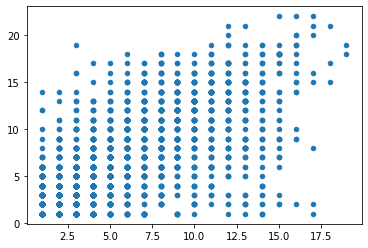

In [97]:
df_correlation = df[df['status'] == 'Finished']
df_correlation = df_correlation[['position', 'fastest_lap_rank']].dropna()
df_correlation_2 = df_correlation.corr()
df_correlation = df_correlation.sort_values(by='position')
#df_correlation.to_csv()
plt.scatter('position', 'fastest_lap_rank', s = 20 , data = df_correlation)
df_correlation_2

In [105]:
group = df_correlation.groupby(['position', 'fastest_lap_rank']).agg({'fastest_lap_rank': 'count'})

In [106]:
group.rename(columns = {'fastest_lap_rank': 'count'},inplace = True)
group = group.reset_index()
group['count'] = group['count'] * 7

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

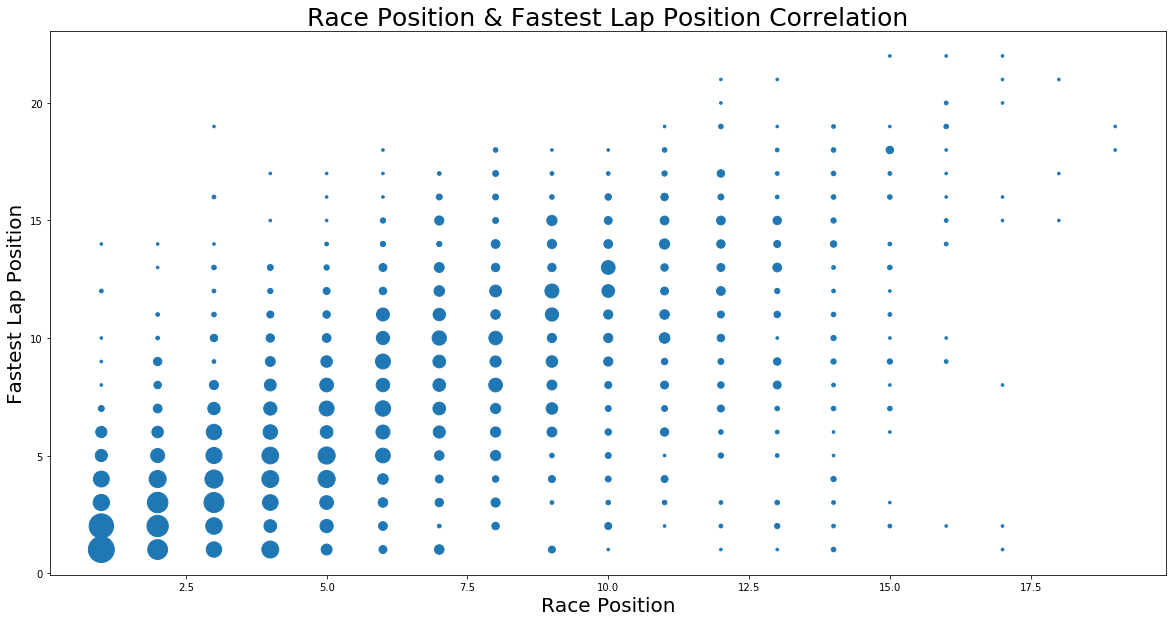

In [138]:
plt.figure(figsize=(20,10))
plt.scatter('position', 'fastest_lap_rank', s ='count' , data = group)
plt.title('Race Position & Fastest Lap Position Correlation', fontdict ={'fontsize' : 25})
plt.xlabel('Race Position', fontsize = 20)
plt.ylabel('Fastest Lap Position', fontsize = 20)
plt.label.set_fontsize(20)
plt.xlim(0,20, fontsize = 10)
plt.ylim(0,20)
plt.figure().text(.5, .05, 'The correlation between race position  and fastest lap position is 0.65', ha='center')

In [148]:
df_correlation_5 = df[(df['status'] == 'Finished') ]
df_correlation_5 = df_correlation_5[['position', 'fastest_lap_rank']].dropna()
#df_correlation_5 = df_correlation_5.corr()
df_correlation_5

,position,fastest_lap_rank
364,1,2.0
365,1,1.0
366,1,1.0
373,2,1.0
374,2,2.0
...,...,...
24518,8,3.0
24521,4,5.0
24524,12,15.0
24525,10,17.0


In [149]:
df_cov = df_correlation_5.cov()

,position,fastest_lap_rank
position,14.172664,11.025286
fastest_lap_rank,11.025286,20.359854
